# Correr experimentos
En este archivo está el código para correr los experimentos

In [2]:
import math, subprocess
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os

In [3]:
def almost_equals(a, b, tolerance = 1e-4):
    return abs(a - b) < tolerance

In [60]:
ruta_del_ejecutable = "../src/tp2.exe"
np.random.seed(10)

# Item 1.2
## Comprobar correctitud del codigo en c++

In [5]:
def ejecutar_algoritmo_cpp(matrix, cantidad, iteraciones=100000, tolerancia= 1e-4):
    # Generamos la input
    archivo_instancia = "input.txt"
    with open(archivo_instancia, "w+") as f:
        for i in range(matrix.shape[0]):
            f.write(" ".join(matrix[i,:].astype("str")))
            f.write("\n")
    
    # Crear proceso para ejecutar el codigo.
    output_dir = os.getcwd()
    
    process = subprocess.Popen([ruta_del_ejecutable, archivo_instancia, str(cantidad), str(iteraciones), str(tolerancia)], cwd=output_dir)

    # Correr experimento.
    exit_code = process.wait()

    # Verificar que el proceso no fallo.
    if exit_code != 0: raise(Exception(F"Hubo un error en , cantidadla ejecución del el algoritmo."))
    
    # Leemos los archivos de salida
    f = open(archivo_instancia + ".autovalores.out", "r")
    autovalores = []
    for line in f:
        autovalores.append(float(line))
    f2 = open(archivo_instancia + ".autovectores.out", "r")
    autovectores = np.zeros((matrix.shape[0], cantidad))
    i = 0
    for line in f2:
        autovectores[i, :] = [float(current) for current in line.split(" ")]
        i += 1
    f3 = open("iteraciones.out", "r")
    iteraciones = []
    for line in f3:
        iteraciones.append(int(line))
    return autovalores, autovectores, iteraciones

### Checkeo de correctitud

In [6]:
matriz = np.random.randint(0, 100, size=(3, 3))
matriz = (matriz + matriz.T) / 2
print(matriz)
autovalores, autovectores, iteraciones = ejecutar_algoritmo_cpp(matriz, matriz.shape[0], 100000, 1e-7)

for i in range(len(autovalores)):
    print(np.dot(matriz, autovectores[:, i]), autovalores[i] * autovectores[:, i])

[[ 9.  21.5 46.5]
 [21.5 89.  50.5]
 [46.5 50.5 73. ]]
[ 48.120141  100.6843945  97.4398355] [ 48.12199742 100.68055305  97.4435411 ]
[-14.2453335  28.2168655 -22.077456 ] [-14.24972565  28.20222618 -22.09328413]
[-13.6723726  -0.8936541   7.6698173] [-13.66826263  -0.89641661   7.67685269]


### Análisis de tiempo de convergencia

In [57]:
matriz = np.random.randint(0, 100, size=(20, 20))
matriz = (matriz + matriz.T) / 2
autovalores, autovectores, iteraciones = ejecutar_algoritmo_cpp(matriz, 20, 100000, 0.0000001)


(6.593505750778419, 1.0527266402654394, 1.129225493084355, 1.018362385956275, 1.0224396536129179, 1.067308580207013, 1.3025968175098195, 1.0141908467042546, 1.078792939873111, 1.105649620360327, 1.2618404998088828, 1.021934328358209, 1.1211834342159366, 1.2417328238655119, 1.1332285575114305, 1.987861636565951)


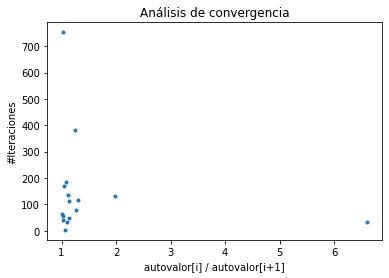

In [61]:
cociente_de_autovalores = []
for i in range(len(autovalores) - 1):
    cociente_de_autovalores.append(abs(autovalores[i] / autovalores[i+1]))
cociente_de_autovalores, iteraciones = zip(*[i for i in zip(cociente_de_autovalores, iteraciones) if True])
print(cociente_de_autovalores)
plt.plot(cociente_de_autovalores, iteraciones, marker='.', linestyle='')
plt.xlabel("autovalor[i] / autovalor[i+1]")
plt.ylabel("#Iteraciones")
plt.title("Análisis de convergencia")
# plt.savefig('./graficos/analisis-convergencia.png')
plt.show()
plt.close()
# No pudimos obtener un resultado satisfactorio con respecto a la teoría así que no va a ir al informe
